# Advanced fMRI data analysis 
## Functional connectivity


In this assignment, your task is to run simple seed-to-voxel functional connectivity analysis of fMRI data in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 19-06-2020

-------------------

## Task 1



Repeat seed-to-voxel analysis from our last excercise with your favourite brain region as a *seed*!

### Fill some details about the selected seed region:

Name of the selected brain area: right hippocampus

MNI coordinates of selected brain area: [x, y, z] 27.52, -18.2, -16.8. I'll use 25, -18 and -17

Source (website, journal article, etc.): "Neurofunctional topography of the human hippocampus", Jennifer L. Robinson et. al,
Hum Brain Mapp. 2015 Dec; 36(12): 5018–5037.

### Loading Stuff

In [17]:
#Loading libraries
import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
import pandas as pd
from scipy import stats


# Load fMRI data
'''
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]

Couldn`t get this to work, because of some problem with fetching, so instead did it manually.
'''
confounds_filename = 'data\sub-pixar001_task-pixar_desc-confounds_regressors.tsv'
func_filename = "data/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"


### Creating seed and extracting it's time-series

In [14]:
#Creating a seed
pcc_coords = [(28, -18, -16)]
seed_masker = input_data.NiftiSpheresMasker(
    pcc_coords, radius=8,
    detrend=True, standardize=True)


#Extracting time-series for a seed
seed_timeseries = seed_masker.fit_transform(func_filename,
                                             confounds=confounds_filename)
seed_timeseries = np.squeeze(seed_timeseries)


### Extracting time-series for the whole brain

In [16]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=8,
    detrend=True, standardize=True,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_timeseries = brain_masker.fit_transform(func_filename,
                                               confounds=confounds_filename)

# Print shape of seed time-series
print(seed_timeseries.shape)

# Print shape of brain time-series
print(brain_timeseries.shape)


(168,)
(168, 39738)


### Seed to voxel correlation

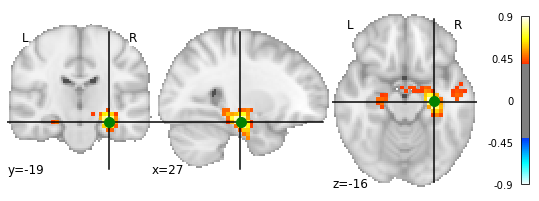

In [19]:
# Calculating Pearson product-moment correlation coefficient between seed and all voxel trime-series
corr_map = np.zeros(brain_timeseries.shape[1])

for i in range(brain_timeseries.shape[1]):
    corr_map[i] = stats.pearsonr(seed_timeseries, brain_timeseries[:,i])[0]

    
seed_to_voxel_correlations_img = brain_masker.inverse_transform(corr_map.T)

# Plot correlation map using plot_stat_map
display = plotting.plot_stat_map(seed_to_voxel_correlations_img, threshold=0.4)

# Add seed ROI marker with display.add_markers()
display.add_markers(pcc_coords, marker_color='g', marker_size=100)

What brain areas are functionally connected with your seed region?

**Answer**: It's obviously highly connected with left hippocampus. However it's also connected with another region, that I can't identify, however it seems to be located in maybe Broadmann area 44.